# The logistic equation

In [1]:
% nothing


ans =

    '9.7.0.1296695 (R2019b) Update 4'



Say $x(t)$ represents a population of bacteria.[^whole] If we assume that each bacterium produces offspring and ages at a constant rate, the result is a constant *net per capita growth rate*:

[^whole]: There is always a whole number of bacteria, of course, but we'll allow real values. For large populations, that shouldn't affect much.

:::{math}
\frac{1}{x} \dd{x}{t} = a.
:::

If $a> 0$, then this is a recipe for exponential growth, à la $x'=ax$. 

There are a lot of assumptions behind that model, but one of the most glaringly suspect is that it supposes an endless supply of food and space. An improved model would decrease the per capita rate as the population increases. The simplest way to do so is to let $b> 0$ be another positive parameter, and define

:::{math}
:label: eq-logistic
\frac{1}{x} \dd{x}{t} = a - bx \quad \Longrightarrow \quad \dd{x}{t} = ax - bx^2.
:::

:::{index} logistic equation
:::

This is the {term}`logistic equation`.

## Steady states

We begin with the steady states. We have $x'=f(x)=x(a-bx)$, with roots $x=0$ and $x=a/b$. Since $f'(x)=a-2bx$, we conclude:

| Steady state | Stability |
|-----------|-----------|
| $x_* = 0$ | unstable |
| $x_* = \frac{a}{b}$ | asymptotically stable | 

:::{index} carrying capacity
:::

The stable equilibrium value 

$$
K=\frac{a}{b}
$$ 

is important and known as the {term}`carrying capacity` of the environment. We will find later that this value is the long-term fate of the system for any positive initial condition.

We can get creative and show that the halfway value $x=K/2$ is also special. Still without knowing explicitly what $x$ is, we can differentiate the ODE and use the chain rule to obtain

:::{math}
x'' = ax'-2b x x' = (a-2bx)(ax-bx^2).
:::

This is zero for $x=K/2=a/2b$, suggesting that it is an inflection point in the graph of $x(t)$ against $t$.

## First solution method: Substitution

When it comes to solving nonlinear ODEs, we take success wherever we can find it. One source of serendipitous solutions is the idea of **variable substitution**, and the logistic equation is a nice case study. 

Define $z=1/x$. From the chain rule we have 

$$
\dd{z}{t} = - x^{-2} \dd{x}{t} = -x' z^2.
$$

The logistic equation therefore converts to

:::{math}
-\frac{z'}{z^2} = \frac{a}{z} - \frac{b}{z^2},
:::

or $z'=b-a z$. This is a linear equation! It even has constant coefficients. 

In terms of $z$, we can jump right to the solution:

:::{math}
z(t) = e^{-at}z(0) - \frac{b}{a} \left( e^{-at}-1 \right) = \frac{e^{-at}(Kz_0-1)+1)}{K}.
:::

Finally, from $x=1/z$ we get

:::{math}
:label: eq-logistic-solution
x(t) = \frac{K x_0}{e^{-at}(K-x_0)+x_0},
:::

where $x_0=x(0)$. 

The solution makes it clear that if $x_0> 0$, then $x\to K$ as $t\to \infty$. The logistic curve is an S-shaped or **sigmoidal** curve. You can think of it as a nice, smooth transition between two states (the two equilibria). For example, suppose $a=6$ and $b=2$.

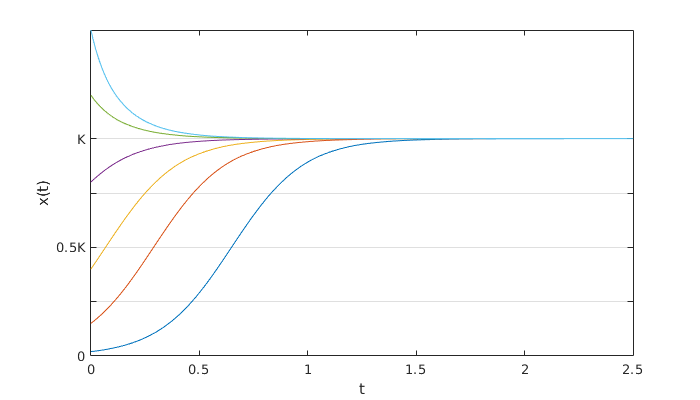

In [2]:
a = 6; b = 2;
K = a/b;

f = @(t,x) a*x - b*x^2;
t = linspace(0,2.5,300);
for x0 = K*[0.02 0.15 0.4 0.8 1.2 1.5]
	[t,x] = ode45(f,t,x0);
	plot(t,x), hold on
end
xlabel('t'), ylabel('x(t)')
set(gca,'ygrid','on',...
'ytick',K*(0:.25:1),'yticklabel',{'0','','0.5K','','K'})

It's not easy to say why this variable substitution works out well here. It's not something you can expect to happen in every problem. The situation is very much like substitutions to solve integration problems: when they work, they're golden, and when they don't, you try something else. 

## Second solution method: Separation

The logistic equation is separable: 

:::{math}
\frac{dx}{x(a-bx)} = dt.
:::

Hence

:::{math} 
t + C = \int \frac{dx}{x(a-bx)} = \frac{1}{b} \int \frac{dx}{x(K-x)} = \frac{1}{bK} \int \left( \frac{1}{x} + \frac{1}{K-x} \right)\,dx.
:::

The last step above required converting the single fraction into partial fractions. These are now easily integrated to get logs, and the solution follows from there. Obviously we have to end up with the same solution as before.